> Advanced WordCloud with Alice Image!!

## 1. Import Library

For these task. 

- `numpy` : image processing as array (masking, etc)
- `wordcloud` : generate word cloud
- `request`, `PIL`, `Image`: read image & txt from url (if you use local file, it doesn't need)
- `matplotlib` : view


In [1]:
import numpy as np 
import requests
from PIL import Image
from io import BytesIO 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 2. Read Image & Text from URL

- `read_img_from_url` : image read from url
- `read_txt_from_url` : you have to set width & height

In [2]:
def read_img_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img_matrix = np.array(img)
    return img_matrix

def read_txt_from_url(url, *size):
    text = requests.get(url).text
    wc = WordCloud(background_color="white", max_words=100 , max_font_size=100, width=size[0], height=size[1], random_state=42)
    wc.generate(text)
    return wc.to_array()
    
img_url = "https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg"
img_matrix = read_img_from_url(img_url)
txt_url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
txt_matrix = read_txt_from_url(txt_url, *img_matrix.shape)

print(img_matrix.shape, txt_matrix.shape)

(1200, 1200, 3) (1200, 1200, 3)


## 3. Make Mask with Numpy

> background color is white

In [3]:
img_matrix[txt_matrix == 255] = 0
print(img_matrix.shape)

(1200, 1200, 3)


## 4. Image Show with Matplotlib

please set figsize & dpi for resolution

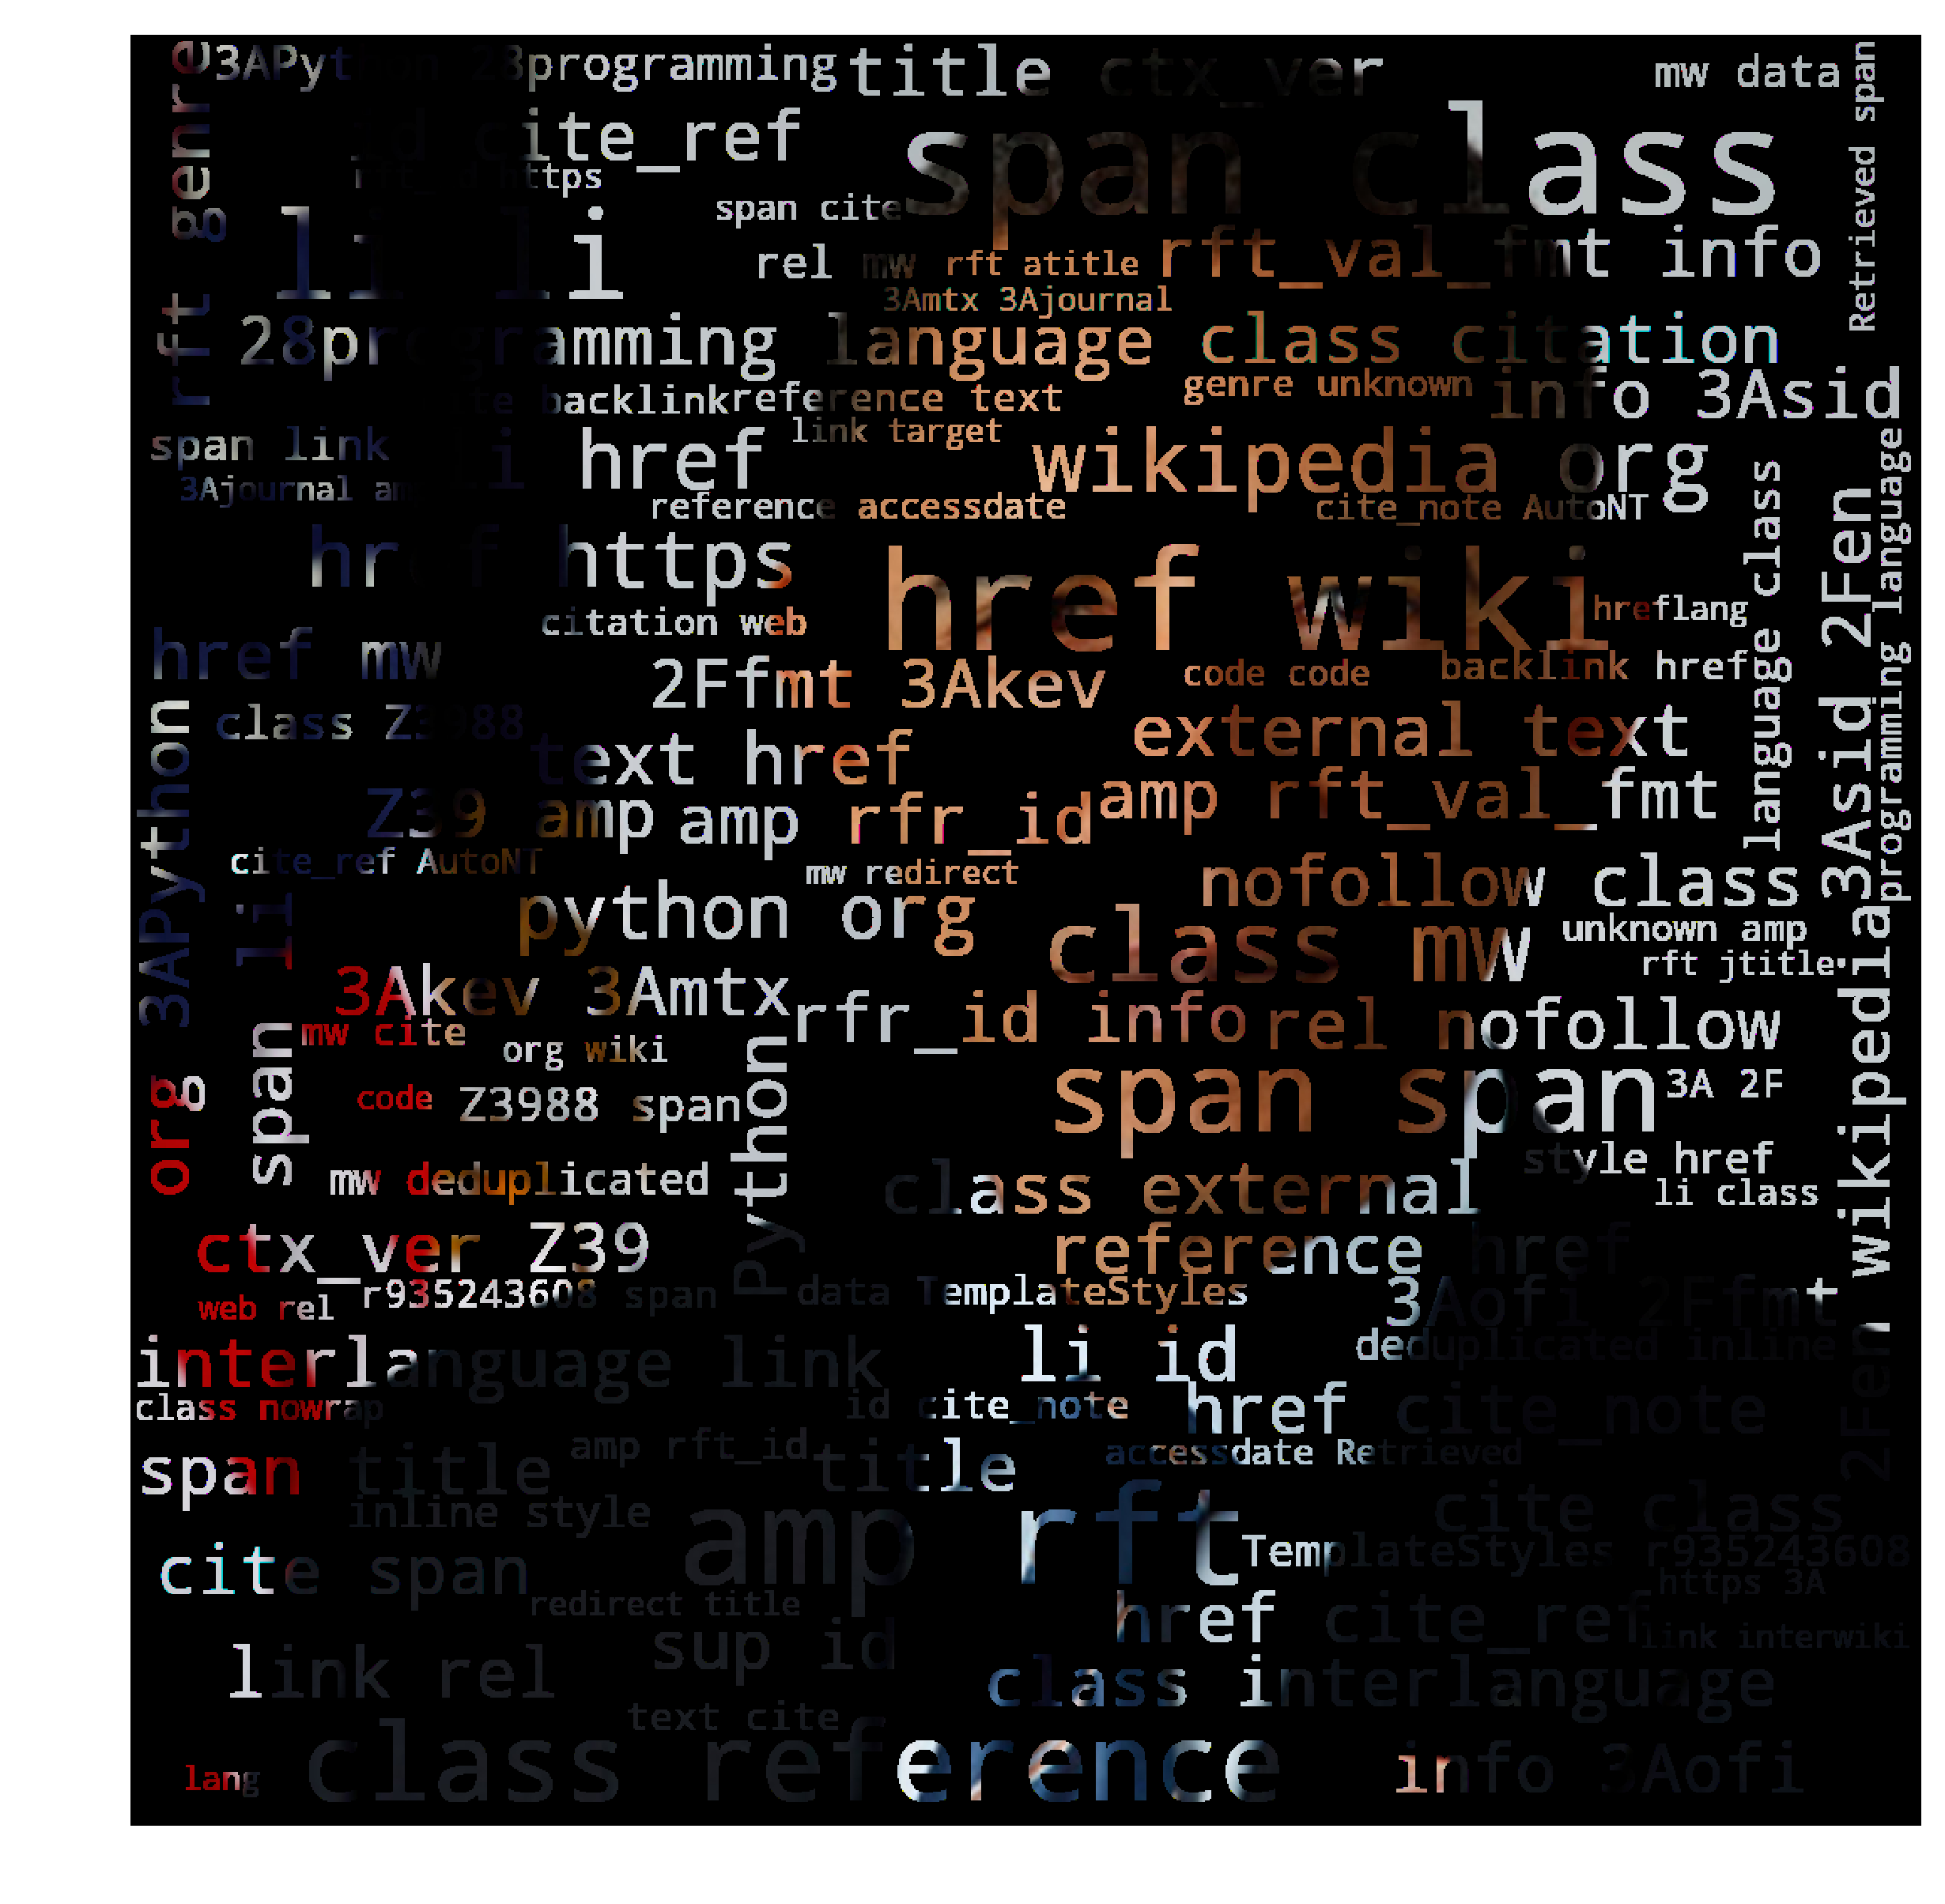

In [4]:
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(img_matrix)
plt.axis('off')
plt.show()